In [41]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

In [42]:
data=np.loadtxt("datos2.txt",delimiter=',',skiprows=0,usecols=[0,1,2],dtype='float')
print(data[:,1] )
dataSize = data.shape
print('Tamaño de data:',dataSize)

[1003. 1003. 1003. 1002. 1004. 1004. 1003. 1003. 1003. 1003. 1004. 1003.
 1003. 1005. 1003. 1004. 1002. 1003. 1004. 1004. 1003. 1002. 1003. 1004.
 1003. 1003. 1003. 1003. 1003. 1003. 1002. 1001. 1004. 1003. 1004. 1003.
 1003. 1004. 1004. 1004. 1002. 1003. 1004. 1003. 1002. 1004. 1003.]
Tamaño de data: (47, 3)


**PLOT DATA**

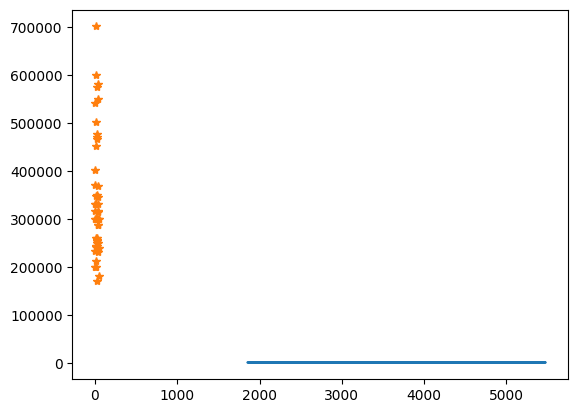

In [43]:
plt.plot(data[:,0],data[:,1],data[:,2],'*')
plt.show()

**NORMALIZAR DATA**

In [50]:
promX = np.mean(data, axis=0)
stdX = np.std(data, axis=0)


print('promX:', promX)
print('stdX:', stdX)

dataNormal = np.zeros((dataSize[0], dataSize[1]))
for i in range(dataSize[0]):
    for j in range(3):
        dataNormal[i, j] = (data[i, j] - promX[j]) / stdX[j]

promX: [  3000.68085106   1003.17021277 341412.76595745]
stdX: [7.86202619e+02 7.52842809e-01 1.23702548e+05]


**PLOT DATA**

In [45]:
Beta = np.zeros((3,1)) # Beta es un vector de 3 filas 1 columna, almacenará a B0 y B1
onesVector = np.ones((dataSize[0],)) # Crea un vector de unos del tamaño de datazise[0]

# Crea la matriz X concatenando onesvector con data[:,0] ==> [:,0] significa todas las filas de la columna 0
X = np.column_stack((onesVector,dataNormal[:,0],dataNormal[:,1]))

# Crea un vector de 0's de m filas y 1 columna
y=np.zeros((dataSize[0],1))

# Se asignan las salidas al vector y
y[:,0] = dataNormal[:,2]

In [46]:
def Gradiente(Beta,alpha,m,X,y,numIter,J):
  betaTemp = np.zeros((3,1))
  h_beta = np.zeros((m,1))

  for i in range(numIter):
    h_beta = np.dot(X,Beta)
    for j in range(3): # Con J=0 se calcula B0 y con J=1 se calcula B1
      temp1 = (np.reshape(X[:,j],(m,1)))

      #Creo temp_diff solo para guardar la resta entre hipotesis y y
      temp_diff = np.subtract(h_beta, y)

      # En temp2 reemplazo la parte correspondiente a la resta po la variable temp_diff
      temp2 = np.sum(np. multiply(temp1,temp_diff))

      betaTemp[j,0] = Beta[j,0] - (temp2*(alpha/m))

    Beta = betaTemp
    h_beta = np.dot(X,Beta)

    # Cost hace la sumatoria de los cuadrados de temp_diff
    J[i]  = np.sum(np.square(temp_diff)) 

  return (Beta, J)


Beta0: 

 [-2.46788405e-16]
Beta1:  [0.832902]
Beta2:  [-0.001635]


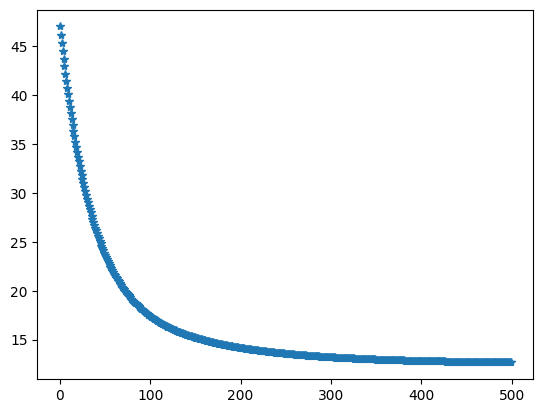

In [47]:
alpha = 0.01
numIter = 500
m = dataSize[0] # Cantidad de datos de entrenamiento
J = np.zeros((numIter,1))
Beta = np.zeros((3,1))

Beta, J = Gradiente(Beta,alpha,m,X,y,numIter,J)

plt.plot(J,'*')
print('Beta0: ', Beta[0])
print('Beta1: ', Beta[1])
print('Beta2: ', Beta[2])


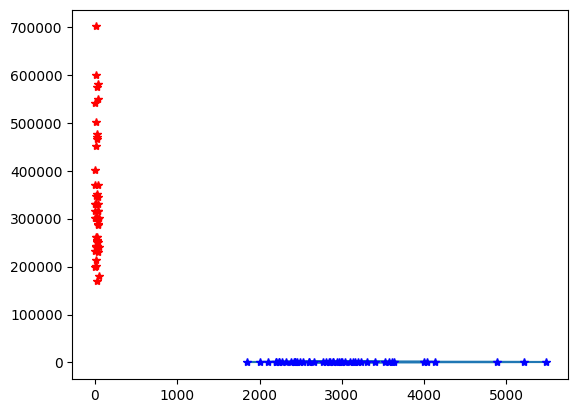

In [48]:
h_beta = np.dot(X,Beta) #cambiar por grafica 3D
plt.plot(data[:,0],data[:,1],data[:,2],'r*')
plt.plot(data[:,0],h_beta,'b*')
plt.show()